In [1]:
import json
from glob import glob
import pandas as pd
import re
import os

In [15]:
from tqdm import tqdm_notebook as tqdm

In [16]:
scores = []
for sc in tqdm(glob("/net/scratch/rdkibler/210126_nmp_hbnet_packing/?/*.sc")):
    with open(sc,'r') as f:
        #d = json.load(f)
        #d['path'] = sc
        
        
        temp_dict = json.loads(f.readline().replace("nan","Infinity"))
        deltas = []
        keys = list(temp_dict.keys())

        befores = []
        afters = []

        for key in keys:
            if re.search("before_.*_score",key):
                after_key = "after" + key[6:]
                before = temp_dict.pop(key)
                after = temp_dict.pop(after_key)
                befores.append(before)
                afters.append(after)
                deltas.append(after - before)

            if re.search(".*_measure",key):
                temp_dict.pop(key)

        temp_dict["min_delta"] = min(deltas)
        temp_dict["max_delta"] = max(deltas)
        temp_dict["avg_delta"] = sum(deltas)/len(deltas)
        temp_dict["cst_before"] = sum(befores)
        temp_dict["min_before"] = min(befores)
        temp_dict["max_before"] = max(befores)
        temp_dict["avg_before"] = temp_dict["cst_before"] / len(befores)
        temp_dict["cst_after"] = sum(afters)
        temp_dict["min_after"] = min(afters)
        temp_dict["max_after"] = max(afters)
        temp_dict["avg_after"] = temp_dict["cst_after"] / len(afters)
        
        
        temp_dict['path'] = sc
        
        #scores.append(d)
        scores.append(temp_dict)

/home/rdkibler/.conda/envs/pyro/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [17]:
pdbs = glob("/net/scratch/rdkibler/210126_nmp_hbnet_packing/?/*.pdb.gz")
pdb_df = pd.DataFrame(pdbs,columns=["pdb_path"])
pdb_df

,pdb_path
0,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
1,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
2,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
3,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
4,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
...,...
12196,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
12197,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
12198,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
12199,/net/scratch/rdkibler/210126_nmp_hbnet_packing...


In [18]:
pdb_df['decoy'] = pdb_df.pdb_path.str.split("/").str[-1].str.split(".pdb").str[0]

In [19]:
#sorted(pdb_df['decoy'].values)

In [20]:
df = pd.DataFrame(scores)

In [21]:
df = df.merge(pdb_df)

In [22]:
df

,decoy,charge_all,charge_chA,charge_chB,complex_normalized,core_holes,dG_cross,dG_cross/dSASAx100,dG_separated,dG_separated/dSASAx100,...,cst_before,min_before,max_before,avg_before,cst_after,min_after,max_after,avg_after,path,pdb_path
0,RC4_20_mini_nm_00073_1.6_31_0001_0019_hb_0007_...,-28.0,-8.0,-20.0,-2.852230,-0.794652,-81.448975,-3.606579,-67.651360,-2.995617,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.051875,0.000000,0.051875,0.017292,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
1,RC4_20_mini_nm_00160_1.6_31_0001_0018_hb_0001_...,-24.0,-7.0,-17.0,-2.783211,-1.010937,-66.332184,-2.952900,-55.644581,-2.477122,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,19.313543,0.374073,12.749053,6.437848,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
2,RC4_20_mini_nm_00247_1.6_31_0001_0014_hb_0005_...,-23.0,-6.0,-17.0,-2.647619,-0.783509,-81.645157,-3.696187,-68.261459,-3.090289,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,4.564012,0.000000,2.941800,0.570501,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
3,RC4_20_mini_nm_00196_1.6_31_0001_0009_hb_designed,-20.0,-7.0,-13.0,-2.871928,-1.432966,-67.898949,-3.496086,-57.369850,-2.953947,...,3.252634e-07,0.0,3.252634e-07,8.131586e-08,0.323617,0.000000,0.164603,0.080904,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
4,RC4_20_mini_nm_00189_1.6_31_0001_0035_hb_0002_...,-24.0,-5.0,-19.0,-2.545835,-0.725095,-56.107426,-2.887192,-40.567043,-2.087511,...,4.179459e-06,0.0,2.933305e-06,5.970656e-07,12.680603,0.000000,10.089285,1.811515,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13064,RC4_20_mini_nm_00137_1.6_31_0001_0003_hb_0001_...,-20.0,-9.0,-11.0,-2.939651,-1.310089,-81.028625,-3.623106,-73.000786,-3.264150,...,2.252540e-06,0.0,2.252540e-06,4.505080e-07,0.375001,0.000000,0.206601,0.075000,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13065,RC4_20_mini_nm_00024_1.6_31_0001_0043_hb_0008_...,-21.0,-3.0,-18.0,-2.592901,-1.293372,-70.895378,-3.149120,-46.302074,-2.056704,...,5.396002e-06,0.0,5.396002e-06,4.496668e-07,23.501426,0.000000,11.868872,1.958452,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13066,RC4_20_mini_nm_00119_1.6_31_0001_0031_hb_0008_...,-18.0,-6.0,-12.0,-2.776134,-0.841522,-77.526001,-3.464630,-64.909142,-2.900784,...,2.774920e-08,0.0,2.774920e-08,4.624867e-09,16.270409,0.000000,14.777391,2.711735,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13067,RC4_20_mini_nm_00242_1.6_31_0001_0002_hb_0002_...,-25.0,-11.0,-14.0,-2.578058,-0.759496,-53.175873,-2.633239,-43.350567,-2.146696,...,4.638527e-06,0.0,4.638527e-06,7.730878e-07,11.625093,0.000000,4.864237,1.937515,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...


In [23]:
cutcol = [x for x in df.columns if "pymol" in x]

In [24]:
#cutcol.extend([x for x in df.columns if ("before" in x and "score" in x) or ("before" in x and "measure" in x) or ("after" in x and "score" in x) or ("after" in x and "measure" in x)])

In [25]:
df = df.drop(columns=cutcol)

In [26]:
df.columns

Index(['decoy', 'charge_all', 'charge_chA', 'charge_chB', 'complex_normalized',
       'core_holes', 'dG_cross', 'dG_cross/dSASAx100', 'dG_separated',
       'dG_separated/dSASAx100', 'dSASA_hphobic', 'dSASA_int', 'dSASA_polar',
       'ddg', 'delta_unsatHbonds', 'dslf_fa13', 'fa_atr', 'fa_dun_dev',
       'fa_dun_rot', 'fa_dun_semi', 'fa_elec', 'fa_intra_atr_xover4',
       'fa_intra_elec', 'fa_intra_rep_xover4', 'fa_intra_sol_xover4', 'fa_rep',
       'fa_sol', 'hbond_E_fraction', 'hbond_bb_sc', 'hbond_lr_bb', 'hbond_sc',
       'hbond_sr_bb', 'hbonds_int', 'hbscore', 'hxl_tors',
       'interface_buried_sasa', 'interface_sc', 'interface_sc_int_area',
       'interface_sc_median_dist', 'lk_ball', 'lk_ball_bridge',
       'lk_ball_bridge_uncpl', 'lk_ball_iso', 'mismatch_probability',
       'nres_all', 'nres_int', 'omega', 'p_aa_pp', 'packstat',
       'per_residue_energy_int', 'post_resurfacing_sap', 'pre_resurfacing_sap',
       'pro_close', 'rama_prepro', 'ref', 'report_designable'

In [15]:
#df = df[df["min_delta"] < 0.001]

count    1.306900e+04
mean     4.778623e-02
std      3.670918e-01
min     -4.206143e-05
25%     -2.591740e-08
50%      0.000000e+00
75%      0.000000e+00
max      7.406383e+00
Name: min_delta, dtype: float64

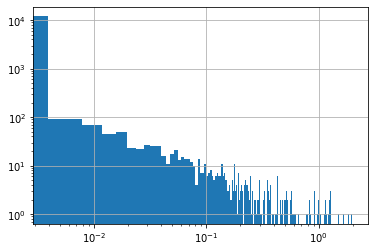

In [27]:
col = "min_delta"
ax = df[df[col] <2][col].hist(bins=500)
ax.set_yscale('log')
ax.set_xscale('log')
df[col].describe(include='all')

count    4.375000e+03
mean     4.568054e-02
std      3.466604e-01
min     -3.176902e-05
25%     -1.543828e-08
50%      0.000000e+00
75%      0.000000e+00
max      7.406383e+00
Name: min_delta, dtype: float64

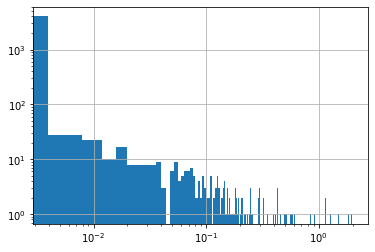

In [14]:
col = "min_delta"
ax = df[df[col] <2][col].hist(bins=500)
ax.set_yscale('log')
ax.set_xscale('log')
df[col].describe(include='all')

count    13069.000000
mean         5.425813
std          6.108497
min          0.000000
25%          0.504700
50%          3.292771
75%          8.727999
max         49.103054
Name: max_delta, dtype: float64

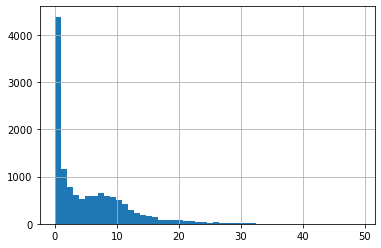

In [29]:
col = "max_delta"
ax = df[col].hist(bins=50)
df[col].describe(include='all')

count    4375.000000
mean        5.326558
std         6.131148
min         0.000000
25%         0.454833
50%         3.105787
75%         8.540993
max        49.103054
Name: max_delta, dtype: float64

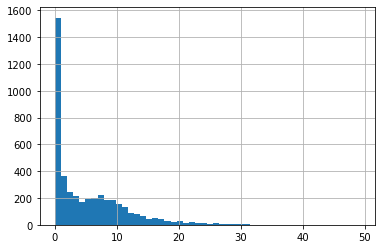

In [16]:
col = "max_delta"
ax = df[col].hist(bins=50)
df[col].describe(include='all')

In [18]:
#df = df[df["max_delta"] < 1.0]

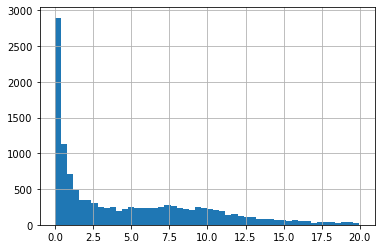

In [30]:
df[df["max_delta"] < 20]["max_delta"].hist(bins=50)

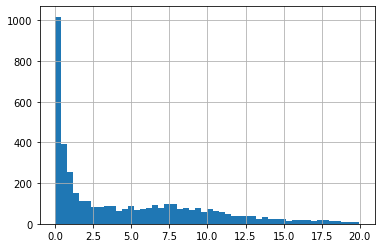

In [17]:
df[df["max_delta"] < 20]["max_delta"].hist(bins=50)

count    13069.000000
mean        -1.174079
std          0.328809
min         -2.494078
25%         -1.396315
50%         -1.172114
75%         -0.951751
max          0.226982
Name: core_holes, dtype: float64

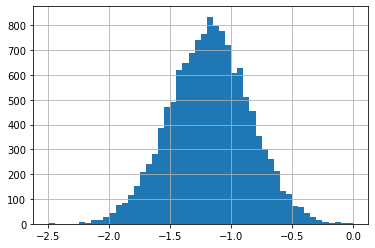

In [31]:
col = "core_holes"
ax = df[df[col] < 0][col].hist(bins=50)
df[col].describe(include='all')

count    4375.000000
mean       -1.165610
std         0.329919
min        -2.222710
25%        -1.392010
50%        -1.163838
75%        -0.936218
max         0.020409
Name: core_holes, dtype: float64

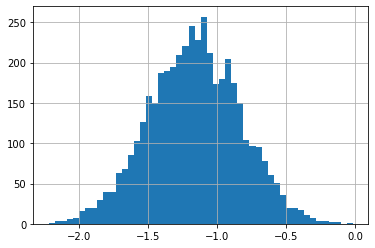

In [19]:
col = "core_holes"
ax = df[df[col] < 0][col].hist(bins=50)
df[col].describe(include='all')

count    13052.000000
mean         0.184892
std          0.096962
min          0.011225
25%          0.119598
50%          0.161001
75%          0.224251
max          0.952878
Name: hbond_E_fraction, dtype: float64

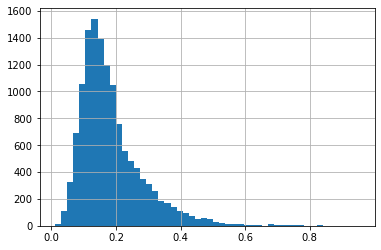

In [35]:
col = "hbond_E_fraction"
ax = df[(df[col]>0) & (df[col]<1)][col].hist(bins=50)
df[(df[col]>0) & (df[col]<1)][col].describe(include='all')

count    4375.000000
mean        0.182267
std         0.105602
min        -0.187314
25%         0.118223
50%         0.158433
75%         0.220335
max         2.833102
Name: hbond_E_fraction, dtype: float64

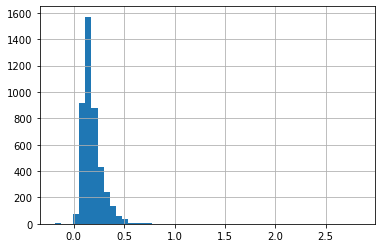

In [20]:
col = "hbond_E_fraction"
ax = df[col].hist(bins=50)
df[col].describe(include='all')

In [21]:
col = "9mer"
df[col].hist(bins=50)
df[col].describe(include='all')

KeyError: '9mer'

count    1.306900e+04
mean    -2.913043e+04
std      5.312713e+05
min     -9.750280e+06
25%     -7.342075e+01
50%     -6.681714e+01
75%     -5.958633e+01
max      3.204044e+01
Name: ddg, dtype: float64

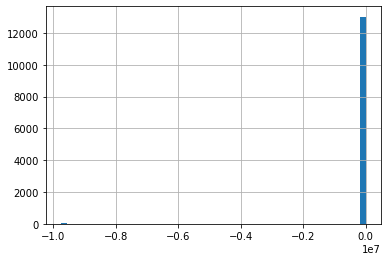

In [36]:
col = "ddg"
df[df[col]<0][col].hist(bins=50)
df[col].describe(include='all')

count    13030.000000
mean       -66.138043
std         10.495531
min       -100.989082
25%        -73.338661
50%        -66.789249
75%        -59.548613
max         32.040436
Name: ddg, dtype: float64

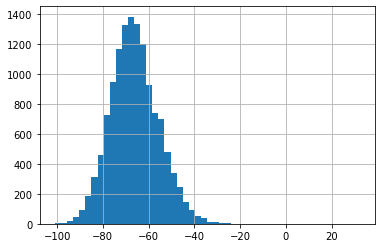

In [37]:
col = "ddg"
df[df[col]>-400][col].hist(bins=50)
df[df[col]>-400][col].describe(include='all')

count    4.375000e+03
mean    -2.455791e+04
std      4.878783e+05
min     -9.746781e+06
25%     -7.349255e+01
50%     -6.694370e+01
75%     -6.008703e+01
max      1.867540e+00
Name: ddg, dtype: float64

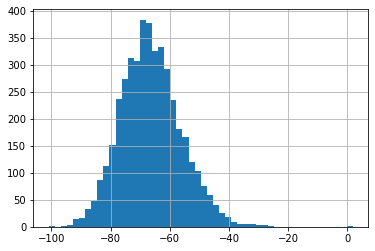

In [23]:
col = "ddg"
df[df[col]>-400][col].hist(bins=50)
df[df[col]>-400][col].describe(include='all')

count    13069.000000
mean         0.694166
std          0.047525
min          0.443940
25%          0.665297
50%          0.698929
75%          0.728002
max          0.830166
Name: interface_sc, dtype: float64

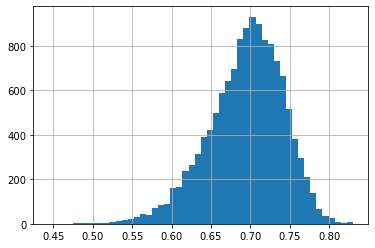

In [38]:
col = "interface_sc"
df[df[col] > 0][col].hist(bins=50)
df[col].describe(include='all')

count    4375.000000
mean        0.695823
std         0.046258
min         0.481086
25%         0.667413
50%         0.699704
75%         0.728680
max         0.829323
Name: interface_sc, dtype: float64

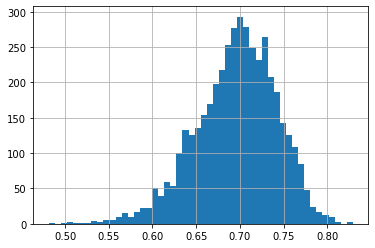

In [25]:
col = "interface_sc"
df[df[col] > 0][col].hist(bins=50)
df[col].describe(include='all')

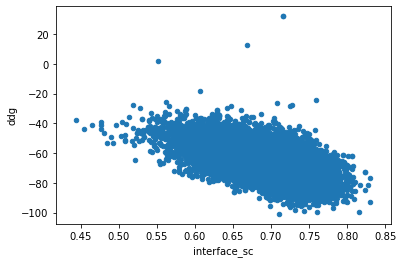

In [39]:
df[(df["interface_sc"] > 0) & (df['ddg'] > -1000)].plot.scatter(x="interface_sc",y="ddg")

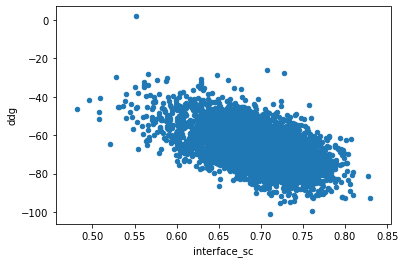

In [26]:
df[(df["interface_sc"] > 0) & (df['ddg'] > -1000)].plot.scatter(x="interface_sc",y="ddg")

count    13069.000000
mean         0.093464
std          0.023600
min          0.051140
25%          0.077494
50%          0.088552
75%          0.103577
max          0.351427
Name: mismatch_probability, dtype: float64

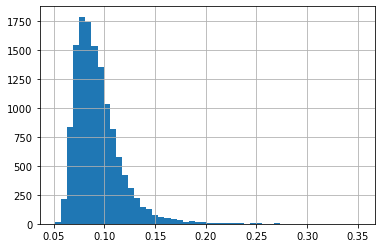

In [40]:
col = "mismatch_probability"
df[df[col] < .5][col].hist(bins=50)
df[col].describe(include='all')

count    4375.000000
mean        0.092464
std         0.022072
min         0.051140
25%         0.077001
50%         0.088216
75%         0.102746
max         0.273264
Name: mismatch_probability, dtype: float64

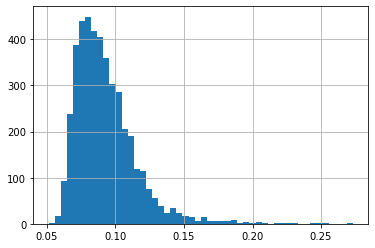

In [27]:
col = "mismatch_probability"
df[df[col] < .5][col].hist(bins=50)
df[col].describe(include='all')

count    4375.000000
mean        0.092464
std         0.022072
min         0.051140
25%         0.077001
50%         0.088216
75%         0.102746
max         0.273264
Name: mismatch_probability, dtype: float64

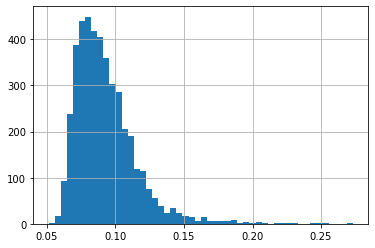

In [28]:
col = "mismatch_probability"
df[df[col] < .5][col].hist(bins=50)
df[col].describe(include='all')

count    13069.000000
mean       -47.223525
std          1.829601
min        -53.331428
25%        -48.488735
50%        -47.334256
75%        -46.078940
max        -39.353855
Name: p_aa_pp, dtype: float64

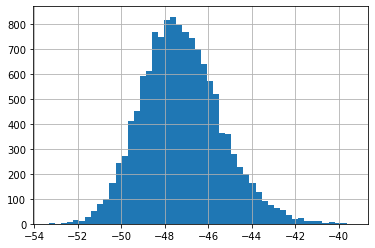

In [41]:
col = "p_aa_pp"
df[col].hist(bins=50)
df[col].describe(include='all')

count    13069.000000
mean         1.090247
std          3.940225
min        -11.118078
25%         -1.705832
50%          0.843006
75%          3.661610
max         17.593091
Name: rama_prepro, dtype: float64

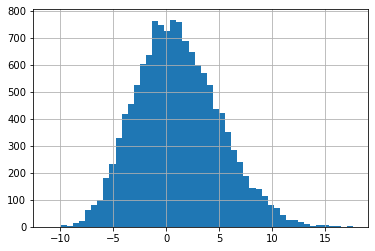

In [42]:
col = "rama_prepro"
df[col].hist(bins=50)
df[col].describe(include='all')

count    13069.000000
mean         0.881093
std          0.958075
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: sbuns5.5_heavy_ball_1.1D, dtype: float64

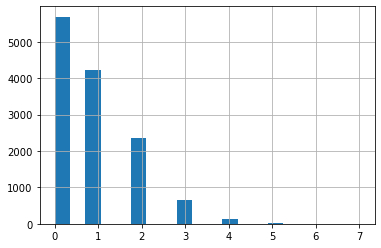

In [43]:
col = "sbuns5.5_heavy_ball_1.1D"
df[col].hist(bins=20)
df[col].describe(include='all')

count    13069.000000
mean         0.641136
std          0.918175
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          7.000000
Name: vbuns5.5_heavy_ball_1.1D, dtype: float64

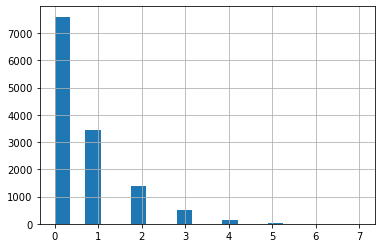

In [44]:
col = "vbuns5.5_heavy_ball_1.1D"
df[col].hist(bins=20)
df[col].describe(include='all')

In [33]:
for p in df[df['vbuns5.5_heavy_ball_1.1D']>=4].pdb_path:
    print(f"cp {p} inspect/")

cp /net/scratch/rdkibler/210126_nmp_hbnet_packing/2/RC4_20_mini_nm_00070_1.6_31_0001_0051_hb_0001_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/210126_nmp_hbnet_packing/2/RC4_20_mini_nm_00061_1.6_31_0001_0046_hb_0001_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/210126_nmp_hbnet_packing/2/RC4_20_mini_nm_00239_1.6_31_0001_0044_hb_0002_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/210126_nmp_hbnet_packing/2/RC4_20_mini_nm_00227_1.6_31_0001_0007_hb_0004_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/210126_nmp_hbnet_packing/2/RC4_20_mini_nm_00022_1.6_31_0001_0011_hb_0015_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/210126_nmp_hbnet_packing/2/RC4_20_mini_nm_00219_1.6_31_0001_0016_hb_0003_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/210126_nmp_hbnet_packing/2/RC4_20_mini_nm_00087_1.6_31_0001_0016_hb_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/210126_nmp_hbnet_packing/2/RC4_20_mini_nm_00003_1.6_31_0001_0052_hb_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/2

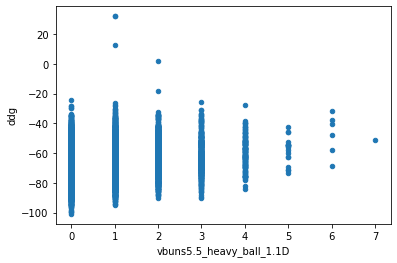

In [45]:
df[df['ddg'] > -1000].plot.scatter(x="vbuns5.5_heavy_ball_1.1D",y="ddg")

In [35]:
df.columns.values

array(['decoy', 'charge_all', 'charge_chA', 'charge_chB',
       'complex_normalized', 'core_holes', 'dG_cross',
       'dG_cross/dSASAx100', 'dG_separated', 'dG_separated/dSASAx100',
       'dSASA_hphobic', 'dSASA_int', 'dSASA_polar', 'ddg',
       'delta_unsatHbonds', 'dslf_fa13', 'fa_atr', 'fa_dun_dev',
       'fa_dun_rot', 'fa_dun_semi', 'fa_elec', 'fa_intra_atr_xover4',
       'fa_intra_elec', 'fa_intra_rep_xover4', 'fa_intra_sol_xover4',
       'fa_rep', 'fa_sol', 'hbond_E_fraction', 'hbond_bb_sc',
       'hbond_lr_bb', 'hbond_sc', 'hbond_sr_bb', 'hbonds_int', 'hbscore',
       'hxl_tors', 'interface_buried_sasa', 'interface_sc',
       'interface_sc_int_area', 'interface_sc_median_dist', 'lk_ball',
       'lk_ball_bridge', 'lk_ball_bridge_uncpl', 'lk_ball_iso',
       'mismatch_probability', 'nres_all', 'nres_int', 'omega', 'p_aa_pp',
       'packstat', 'per_residue_energy_int', 'post_resurfacing_sap',
       'pre_resurfacing_sap', 'pro_close', 'rama_prepro', 'ref',
       'repo

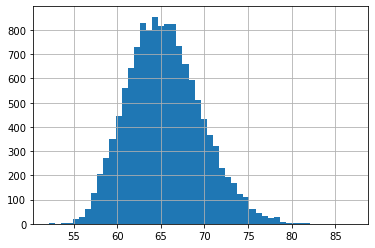

In [46]:
col = "post_resurfacing_sap"
df[col].hist(bins=50)

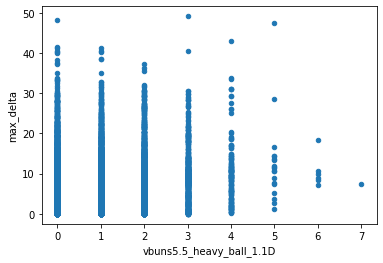

In [47]:
df[df['ddg'] > -1000].plot.scatter(x="vbuns5.5_heavy_ball_1.1D",y="max_delta")

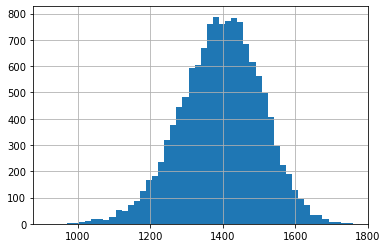

In [48]:
col = "interface_sc_int_area"
df[col].hist(bins=50)

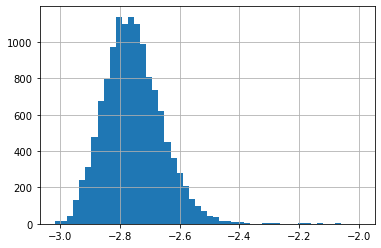

In [49]:
col = "total_score"
(df[col]/210).hist(bins=50)

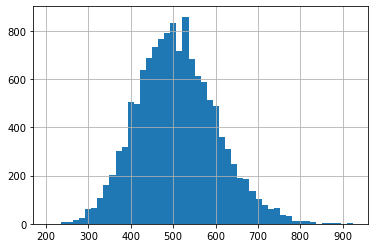

In [50]:
col = "hbscore"
(df[col]).hist(bins=50)

In [53]:
df

,decoy,charge_all,charge_chA,charge_chB,complex_normalized,core_holes,dG_cross,dG_cross/dSASAx100,dG_separated,dG_separated/dSASAx100,...,cst_before,min_before,max_before,avg_before,cst_after,min_after,max_after,avg_after,path,pdb_path
0,RC4_20_mini_nm_00073_1.6_31_0001_0019_hb_0007_...,-28.0,-8.0,-20.0,-2.852230,-0.794652,-81.448975,-3.606579,-67.651360,-2.995617,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.051875,0.000000,0.051875,0.017292,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
1,RC4_20_mini_nm_00160_1.6_31_0001_0018_hb_0001_...,-24.0,-7.0,-17.0,-2.783211,-1.010937,-66.332184,-2.952900,-55.644581,-2.477122,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,19.313543,0.374073,12.749053,6.437848,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
2,RC4_20_mini_nm_00247_1.6_31_0001_0014_hb_0005_...,-23.0,-6.0,-17.0,-2.647619,-0.783509,-81.645157,-3.696187,-68.261459,-3.090289,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,4.564012,0.000000,2.941800,0.570501,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
3,RC4_20_mini_nm_00196_1.6_31_0001_0009_hb_designed,-20.0,-7.0,-13.0,-2.871928,-1.432966,-67.898949,-3.496086,-57.369850,-2.953947,...,3.252634e-07,0.0,3.252634e-07,8.131586e-08,0.323617,0.000000,0.164603,0.080904,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
4,RC4_20_mini_nm_00189_1.6_31_0001_0035_hb_0002_...,-24.0,-5.0,-19.0,-2.545835,-0.725095,-56.107426,-2.887192,-40.567043,-2.087511,...,4.179459e-06,0.0,2.933305e-06,5.970656e-07,12.680603,0.000000,10.089285,1.811515,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13064,RC4_20_mini_nm_00137_1.6_31_0001_0003_hb_0001_...,-20.0,-9.0,-11.0,-2.939651,-1.310089,-81.028625,-3.623106,-73.000786,-3.264150,...,2.252540e-06,0.0,2.252540e-06,4.505080e-07,0.375001,0.000000,0.206601,0.075000,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13065,RC4_20_mini_nm_00024_1.6_31_0001_0043_hb_0008_...,-21.0,-3.0,-18.0,-2.592901,-1.293372,-70.895378,-3.149120,-46.302074,-2.056704,...,5.396002e-06,0.0,5.396002e-06,4.496668e-07,23.501426,0.000000,11.868872,1.958452,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13066,RC4_20_mini_nm_00119_1.6_31_0001_0031_hb_0008_...,-18.0,-6.0,-12.0,-2.776134,-0.841522,-77.526001,-3.464630,-64.909142,-2.900784,...,2.774920e-08,0.0,2.774920e-08,4.624867e-09,16.270409,0.000000,14.777391,2.711735,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13067,RC4_20_mini_nm_00242_1.6_31_0001_0002_hb_0002_...,-25.0,-11.0,-14.0,-2.578058,-0.759496,-53.175873,-2.633239,-43.350567,-2.146696,...,4.638527e-06,0.0,4.638527e-06,7.730878e-07,11.625093,0.000000,4.864237,1.937515,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...


# Filtering #

In [51]:
filter_df = df.copy()

In [52]:
filter_df = filter_df[filter_df['ddg'] <= -60]
filter_df

,decoy,charge_all,charge_chA,charge_chB,complex_normalized,core_holes,dG_cross,dG_cross/dSASAx100,dG_separated,dG_separated/dSASAx100,...,cst_before,min_before,max_before,avg_before,cst_after,min_after,max_after,avg_after,path,pdb_path
0,RC4_20_mini_nm_00073_1.6_31_0001_0019_hb_0007_...,-28.0,-8.0,-20.0,-2.852230,-0.794652,-81.448975,-3.606579,-67.651360,-2.995617,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.051875,0.000000,0.051875,0.017292,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
2,RC4_20_mini_nm_00247_1.6_31_0001_0014_hb_0005_...,-23.0,-6.0,-17.0,-2.647619,-0.783509,-81.645157,-3.696187,-68.261459,-3.090289,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,4.564012,0.000000,2.941800,0.570501,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
3,RC4_20_mini_nm_00196_1.6_31_0001_0009_hb_designed,-20.0,-7.0,-13.0,-2.871928,-1.432966,-67.898949,-3.496086,-57.369850,-2.953947,...,3.252634e-07,0.0,3.252634e-07,8.131586e-08,0.323617,0.000000,0.164603,0.080904,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
5,RC4_20_mini_nm_00011_1.6_31_0001_0047_hb_0007_...,-29.0,-11.0,-18.0,-2.771191,-1.409464,-84.818649,-3.682276,-70.445923,-3.058305,...,1.677787e-06,0.0,1.677787e-06,2.396838e-07,4.496509,0.000000,2.568331,0.642358,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
7,RC4_20_mini_nm_00133_1.6_31_0001_0004_hb_designed,-21.0,-8.0,-13.0,-2.726641,-1.388757,-77.330254,-3.572963,-64.125504,-2.962851,...,2.913067e-07,0.0,2.913067e-07,4.855112e-08,16.764005,0.000000,11.473262,2.794001,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13062,RC4_20_mini_nm_00035_1.6_31_0001_0023_hb_0004_...,-20.0,-6.0,-14.0,-2.769220,-1.788582,-88.383499,-4.020890,-70.382988,-3.201981,...,3.933897e-06,0.0,3.240935e-06,9.834743e-07,1.110624,0.000000,1.009815,0.277656,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13063,RC4_20_mini_nm_00059_1.6_31_0001_0014_hb_designed,-24.0,-7.0,-17.0,-2.616805,-1.415290,-74.475288,-3.562327,-60.658649,-2.901445,...,6.578865e-08,0.0,6.578865e-08,1.644716e-08,5.140804,0.421892,2.728617,1.285201,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13064,RC4_20_mini_nm_00137_1.6_31_0001_0003_hb_0001_...,-20.0,-9.0,-11.0,-2.939651,-1.310089,-81.028625,-3.623106,-73.000786,-3.264150,...,2.252540e-06,0.0,2.252540e-06,4.505080e-07,0.375001,0.000000,0.206601,0.075000,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13066,RC4_20_mini_nm_00119_1.6_31_0001_0031_hb_0008_...,-18.0,-6.0,-12.0,-2.776134,-0.841522,-77.526001,-3.464630,-64.909142,-2.900784,...,2.774920e-08,0.0,2.774920e-08,4.624867e-09,16.270409,0.000000,14.777391,2.711735,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...


In [54]:
filter_df = filter_df[filter_df['max_delta'] <= 1.0]
filter_df

,decoy,charge_all,charge_chA,charge_chB,complex_normalized,core_holes,dG_cross,dG_cross/dSASAx100,dG_separated,dG_separated/dSASAx100,...,cst_before,min_before,max_before,avg_before,cst_after,min_after,max_after,avg_after,path,pdb_path
0,RC4_20_mini_nm_00073_1.6_31_0001_0019_hb_0007_...,-28.0,-8.0,-20.0,-2.852230,-0.794652,-81.448975,-3.606579,-67.651360,-2.995617,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.051875,0.0,0.051875,0.017292,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
3,RC4_20_mini_nm_00196_1.6_31_0001_0009_hb_designed,-20.0,-7.0,-13.0,-2.871928,-1.432966,-67.898949,-3.496086,-57.369850,-2.953947,...,3.252634e-07,0.0,3.252634e-07,8.131586e-08,0.323617,0.0,0.164603,0.080904,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
15,RC4_20_mini_nm_00205_1.6_31_0001_0060_hb_designed,-25.0,-11.0,-14.0,-2.805602,-1.882057,-87.267479,-3.841612,-65.209267,-2.870585,...,1.929671e-09,0.0,1.929671e-09,4.824178e-10,0.010015,0.0,0.010015,0.002504,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
25,RC4_20_mini_nm_00188_1.6_31_0001_0051_hb_0001_...,-21.0,-7.0,-14.0,-2.799814,-1.317782,-73.899063,-3.426326,-60.309666,-2.796254,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.626301,0.0,0.621695,0.125260,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
27,RC4_20_mini_nm_00039_1.6_31_0001_0047_hb_0001_...,-20.0,-8.0,-12.0,-2.847136,-1.175872,-88.830208,-3.870493,-77.899857,-3.394238,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.208311,0.0,0.474480,0.201385,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13058,RC4_20_mini_nm_00231_1.6_31_0001_0044_hb_designed,-23.0,-9.0,-14.0,-2.828184,-1.240379,-89.879066,-3.631762,-76.113853,-3.075548,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.006060,0.0,0.006060,0.001515,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13060,RC4_20_mini_nm_00164_1.6_31_0001_0008_hb_0006_...,-18.0,-5.0,-13.0,-2.751334,-1.195213,-70.517365,-3.575794,-61.700745,-3.128721,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.933989,0.0,0.454082,0.093399,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13061,RC4_20_mini_nm_00175_1.6_31_0001_0018_hb_0004_...,-19.0,-8.0,-11.0,-2.707455,-0.692953,-80.904900,-3.582813,-62.157879,-2.752615,...,1.544469e-05,0.0,1.189434e-05,2.206385e-06,0.404575,0.0,0.206955,0.057796,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13064,RC4_20_mini_nm_00137_1.6_31_0001_0003_hb_0001_...,-20.0,-9.0,-11.0,-2.939651,-1.310089,-81.028625,-3.623106,-73.000786,-3.264150,...,2.252540e-06,0.0,2.252540e-06,4.505080e-07,0.375001,0.0,0.206601,0.075000,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...


In [55]:
filter_df = filter_df[filter_df['interface_sc'] >= 0.65]
filter_df

,decoy,charge_all,charge_chA,charge_chB,complex_normalized,core_holes,dG_cross,dG_cross/dSASAx100,dG_separated,dG_separated/dSASAx100,...,cst_before,min_before,max_before,avg_before,cst_after,min_after,max_after,avg_after,path,pdb_path
0,RC4_20_mini_nm_00073_1.6_31_0001_0019_hb_0007_...,-28.0,-8.0,-20.0,-2.852230,-0.794652,-81.448975,-3.606579,-67.651360,-2.995617,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.051875,0.0,0.051875,0.017292,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
3,RC4_20_mini_nm_00196_1.6_31_0001_0009_hb_designed,-20.0,-7.0,-13.0,-2.871928,-1.432966,-67.898949,-3.496086,-57.369850,-2.953947,...,3.252634e-07,0.0,3.252634e-07,8.131586e-08,0.323617,0.0,0.164603,0.080904,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
15,RC4_20_mini_nm_00205_1.6_31_0001_0060_hb_designed,-25.0,-11.0,-14.0,-2.805602,-1.882057,-87.267479,-3.841612,-65.209267,-2.870585,...,1.929671e-09,0.0,1.929671e-09,4.824178e-10,0.010015,0.0,0.010015,0.002504,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
25,RC4_20_mini_nm_00188_1.6_31_0001_0051_hb_0001_...,-21.0,-7.0,-14.0,-2.799814,-1.317782,-73.899063,-3.426326,-60.309666,-2.796254,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.626301,0.0,0.621695,0.125260,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
27,RC4_20_mini_nm_00039_1.6_31_0001_0047_hb_0001_...,-20.0,-8.0,-12.0,-2.847136,-1.175872,-88.830208,-3.870493,-77.899857,-3.394238,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.208311,0.0,0.474480,0.201385,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13058,RC4_20_mini_nm_00231_1.6_31_0001_0044_hb_designed,-23.0,-9.0,-14.0,-2.828184,-1.240379,-89.879066,-3.631762,-76.113853,-3.075548,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.006060,0.0,0.006060,0.001515,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13060,RC4_20_mini_nm_00164_1.6_31_0001_0008_hb_0006_...,-18.0,-5.0,-13.0,-2.751334,-1.195213,-70.517365,-3.575794,-61.700745,-3.128721,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.933989,0.0,0.454082,0.093399,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13061,RC4_20_mini_nm_00175_1.6_31_0001_0018_hb_0004_...,-19.0,-8.0,-11.0,-2.707455,-0.692953,-80.904900,-3.582813,-62.157879,-2.752615,...,1.544469e-05,0.0,1.189434e-05,2.206385e-06,0.404575,0.0,0.206955,0.057796,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13064,RC4_20_mini_nm_00137_1.6_31_0001_0003_hb_0001_...,-20.0,-9.0,-11.0,-2.939651,-1.310089,-81.028625,-3.623106,-73.000786,-3.264150,...,2.252540e-06,0.0,2.252540e-06,4.505080e-07,0.375001,0.0,0.206601,0.075000,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...


In [57]:
filter_df['core_holes'].describe()

count    3320.000000
mean       -1.195767
std         0.314893
min        -2.494078
25%        -1.406499
50%        -1.196686
75%        -0.983224
max         0.020409
Name: core_holes, dtype: float64

In [58]:
filter_df = filter_df[filter_df['core_holes'] <= -0.24]
filter_df

,decoy,charge_all,charge_chA,charge_chB,complex_normalized,core_holes,dG_cross,dG_cross/dSASAx100,dG_separated,dG_separated/dSASAx100,...,cst_before,min_before,max_before,avg_before,cst_after,min_after,max_after,avg_after,path,pdb_path
0,RC4_20_mini_nm_00073_1.6_31_0001_0019_hb_0007_...,-28.0,-8.0,-20.0,-2.852230,-0.794652,-81.448975,-3.606579,-67.651360,-2.995617,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.051875,0.0,0.051875,0.017292,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
3,RC4_20_mini_nm_00196_1.6_31_0001_0009_hb_designed,-20.0,-7.0,-13.0,-2.871928,-1.432966,-67.898949,-3.496086,-57.369850,-2.953947,...,3.252634e-07,0.0,3.252634e-07,8.131586e-08,0.323617,0.0,0.164603,0.080904,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
15,RC4_20_mini_nm_00205_1.6_31_0001_0060_hb_designed,-25.0,-11.0,-14.0,-2.805602,-1.882057,-87.267479,-3.841612,-65.209267,-2.870585,...,1.929671e-09,0.0,1.929671e-09,4.824178e-10,0.010015,0.0,0.010015,0.002504,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
25,RC4_20_mini_nm_00188_1.6_31_0001_0051_hb_0001_...,-21.0,-7.0,-14.0,-2.799814,-1.317782,-73.899063,-3.426326,-60.309666,-2.796254,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.626301,0.0,0.621695,0.125260,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
27,RC4_20_mini_nm_00039_1.6_31_0001_0047_hb_0001_...,-20.0,-8.0,-12.0,-2.847136,-1.175872,-88.830208,-3.870493,-77.899857,-3.394238,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.208311,0.0,0.474480,0.201385,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13058,RC4_20_mini_nm_00231_1.6_31_0001_0044_hb_designed,-23.0,-9.0,-14.0,-2.828184,-1.240379,-89.879066,-3.631762,-76.113853,-3.075548,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.006060,0.0,0.006060,0.001515,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13060,RC4_20_mini_nm_00164_1.6_31_0001_0008_hb_0006_...,-18.0,-5.0,-13.0,-2.751334,-1.195213,-70.517365,-3.575794,-61.700745,-3.128721,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.933989,0.0,0.454082,0.093399,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13061,RC4_20_mini_nm_00175_1.6_31_0001_0018_hb_0004_...,-19.0,-8.0,-11.0,-2.707455,-0.692953,-80.904900,-3.582813,-62.157879,-2.752615,...,1.544469e-05,0.0,1.189434e-05,2.206385e-06,0.404575,0.0,0.206955,0.057796,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13064,RC4_20_mini_nm_00137_1.6_31_0001_0003_hb_0001_...,-20.0,-9.0,-11.0,-2.939651,-1.310089,-81.028625,-3.623106,-73.000786,-3.264150,...,2.252540e-06,0.0,2.252540e-06,4.505080e-07,0.375001,0.0,0.206601,0.075000,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...


In [59]:
filter_df = filter_df[filter_df['vbuns5.5_heavy_ball_1.1D'] == 0]
filter_df

,decoy,charge_all,charge_chA,charge_chB,complex_normalized,core_holes,dG_cross,dG_cross/dSASAx100,dG_separated,dG_separated/dSASAx100,...,cst_before,min_before,max_before,avg_before,cst_after,min_after,max_after,avg_after,path,pdb_path
0,RC4_20_mini_nm_00073_1.6_31_0001_0019_hb_0007_...,-28.0,-8.0,-20.0,-2.852230,-0.794652,-81.448975,-3.606579,-67.651360,-2.995617,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.051875,0.0,0.051875,0.017292,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
3,RC4_20_mini_nm_00196_1.6_31_0001_0009_hb_designed,-20.0,-7.0,-13.0,-2.871928,-1.432966,-67.898949,-3.496086,-57.369850,-2.953947,...,3.252634e-07,0.0,3.252634e-07,8.131586e-08,0.323617,0.0,0.164603,0.080904,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
15,RC4_20_mini_nm_00205_1.6_31_0001_0060_hb_designed,-25.0,-11.0,-14.0,-2.805602,-1.882057,-87.267479,-3.841612,-65.209267,-2.870585,...,1.929671e-09,0.0,1.929671e-09,4.824178e-10,0.010015,0.0,0.010015,0.002504,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
25,RC4_20_mini_nm_00188_1.6_31_0001_0051_hb_0001_...,-21.0,-7.0,-14.0,-2.799814,-1.317782,-73.899063,-3.426326,-60.309666,-2.796254,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.626301,0.0,0.621695,0.125260,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
27,RC4_20_mini_nm_00039_1.6_31_0001_0047_hb_0001_...,-20.0,-8.0,-12.0,-2.847136,-1.175872,-88.830208,-3.870493,-77.899857,-3.394238,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.208311,0.0,0.474480,0.201385,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13053,RC4_20_mini_nm_00058_1.6_31_0001_0048_hb_0002_...,-19.0,-6.0,-13.0,-2.725772,-1.154527,-84.020798,-3.643101,-67.191429,-2.913388,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.118986,0.0,0.118986,0.029747,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13058,RC4_20_mini_nm_00231_1.6_31_0001_0044_hb_designed,-23.0,-9.0,-14.0,-2.828184,-1.240379,-89.879066,-3.631762,-76.113853,-3.075548,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.006060,0.0,0.006060,0.001515,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13060,RC4_20_mini_nm_00164_1.6_31_0001_0008_hb_0006_...,-18.0,-5.0,-13.0,-2.751334,-1.195213,-70.517365,-3.575794,-61.700745,-3.128721,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.933989,0.0,0.454082,0.093399,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13064,RC4_20_mini_nm_00137_1.6_31_0001_0003_hb_0001_...,-20.0,-9.0,-11.0,-2.939651,-1.310089,-81.028625,-3.623106,-73.000786,-3.264150,...,2.252540e-06,0.0,2.252540e-06,4.505080e-07,0.375001,0.0,0.206601,0.075000,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...


In [60]:
filter_df = filter_df[filter_df['sbuns5.5_heavy_ball_1.1D'] <= 2]
filter_df

,decoy,charge_all,charge_chA,charge_chB,complex_normalized,core_holes,dG_cross,dG_cross/dSASAx100,dG_separated,dG_separated/dSASAx100,...,cst_before,min_before,max_before,avg_before,cst_after,min_after,max_after,avg_after,path,pdb_path
0,RC4_20_mini_nm_00073_1.6_31_0001_0019_hb_0007_...,-28.0,-8.0,-20.0,-2.852230,-0.794652,-81.448975,-3.606579,-67.651360,-2.995617,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.051875,0.0,0.051875,0.017292,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
3,RC4_20_mini_nm_00196_1.6_31_0001_0009_hb_designed,-20.0,-7.0,-13.0,-2.871928,-1.432966,-67.898949,-3.496086,-57.369850,-2.953947,...,3.252634e-07,0.0,3.252634e-07,8.131586e-08,0.323617,0.0,0.164603,0.080904,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
15,RC4_20_mini_nm_00205_1.6_31_0001_0060_hb_designed,-25.0,-11.0,-14.0,-2.805602,-1.882057,-87.267479,-3.841612,-65.209267,-2.870585,...,1.929671e-09,0.0,1.929671e-09,4.824178e-10,0.010015,0.0,0.010015,0.002504,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
25,RC4_20_mini_nm_00188_1.6_31_0001_0051_hb_0001_...,-21.0,-7.0,-14.0,-2.799814,-1.317782,-73.899063,-3.426326,-60.309666,-2.796254,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.626301,0.0,0.621695,0.125260,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
27,RC4_20_mini_nm_00039_1.6_31_0001_0047_hb_0001_...,-20.0,-8.0,-12.0,-2.847136,-1.175872,-88.830208,-3.870493,-77.899857,-3.394238,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.208311,0.0,0.474480,0.201385,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13053,RC4_20_mini_nm_00058_1.6_31_0001_0048_hb_0002_...,-19.0,-6.0,-13.0,-2.725772,-1.154527,-84.020798,-3.643101,-67.191429,-2.913388,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.118986,0.0,0.118986,0.029747,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13058,RC4_20_mini_nm_00231_1.6_31_0001_0044_hb_designed,-23.0,-9.0,-14.0,-2.828184,-1.240379,-89.879066,-3.631762,-76.113853,-3.075548,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.006060,0.0,0.006060,0.001515,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13060,RC4_20_mini_nm_00164_1.6_31_0001_0008_hb_0006_...,-18.0,-5.0,-13.0,-2.751334,-1.195213,-70.517365,-3.575794,-61.700745,-3.128721,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.933989,0.0,0.454082,0.093399,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13064,RC4_20_mini_nm_00137_1.6_31_0001_0003_hb_0001_...,-20.0,-9.0,-11.0,-2.939651,-1.310089,-81.028625,-3.623106,-73.000786,-3.264150,...,2.252540e-06,0.0,2.252540e-06,4.505080e-07,0.375001,0.0,0.206601,0.075000,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...


In [61]:
filter_df = filter_df[filter_df['mismatch_probability'] <= 0.08]
filter_df

,decoy,charge_all,charge_chA,charge_chB,complex_normalized,core_holes,dG_cross,dG_cross/dSASAx100,dG_separated,dG_separated/dSASAx100,...,cst_before,min_before,max_before,avg_before,cst_after,min_after,max_after,avg_after,path,pdb_path
3,RC4_20_mini_nm_00196_1.6_31_0001_0009_hb_designed,-20.0,-7.0,-13.0,-2.871928,-1.432966,-67.898949,-3.496086,-57.369850,-2.953947,...,3.252634e-07,0.0,3.252634e-07,8.131586e-08,0.323617,0.0,0.164603,0.080904,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
15,RC4_20_mini_nm_00205_1.6_31_0001_0060_hb_designed,-25.0,-11.0,-14.0,-2.805602,-1.882057,-87.267479,-3.841612,-65.209267,-2.870585,...,1.929671e-09,0.0,1.929671e-09,4.824178e-10,0.010015,0.0,0.010015,0.002504,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
27,RC4_20_mini_nm_00039_1.6_31_0001_0047_hb_0001_...,-20.0,-8.0,-12.0,-2.847136,-1.175872,-88.830208,-3.870493,-77.899857,-3.394238,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.208311,0.0,0.474480,0.201385,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
40,RC4_20_mini_nm_00063_1.6_31_0001_0001_hb_0001_...,-21.0,-4.0,-17.0,-2.697060,-1.505257,-88.826859,-3.712470,-74.987381,-3.134056,...,7.906158e-06,0.0,7.879828e-06,1.317693e-06,0.243862,0.0,0.121122,0.040644,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
41,RC4_20_mini_nm_00203_1.6_31_0001_0051_hb_0031_...,-25.0,-8.0,-17.0,-2.689580,-1.091249,-79.240929,-3.600708,-63.479755,-2.884520,...,4.386067e-06,0.0,3.078973e-06,8.772135e-07,0.138639,0.0,0.129561,0.027728,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,RC4_20_mini_nm_00064_1.6_31_0001_0009_hb_0006_...,-21.0,-8.0,-13.0,-2.792698,-1.398176,-68.908394,-3.558037,-60.548866,-3.126398,...,2.151395e-10,0.0,2.151395e-10,3.585659e-11,0.506078,0.0,0.194696,0.084346,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13007,RC4_20_mini_nm_00161_1.6_31_0001_0045_hb_designed,-24.0,-12.0,-12.0,-2.790472,-1.101748,-86.822891,-3.695247,-80.374359,-3.420793,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.483654,0.0,0.449270,0.161218,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13046,RC4_20_mini_nm_00164_1.6_31_0001_0050_hb_designed,-19.0,-5.0,-14.0,-2.844995,-1.370607,-76.427147,-3.652016,-67.293983,-3.215595,...,3.751290e-07,0.0,3.751290e-07,9.378226e-08,0.442616,0.0,0.442603,0.110654,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13049,RC4_20_mini_nm_00129_1.6_31_0001_0057_hb_0001_...,-25.0,-10.0,-15.0,-2.789012,-0.485168,-80.316116,-3.859637,-64.268692,-3.088469,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.390907,0.0,0.774272,0.347727,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...


count    962.000000
mean      66.065004
std        4.180495
min       56.376305
25%       63.081477
50%       65.698475
75%       68.838375
max       84.440155
Name: post_resurfacing_sap, dtype: float64

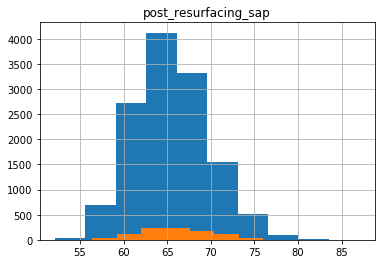

In [62]:
ax = df.hist("post_resurfacing_sap")
ax = filter_df.hist("post_resurfacing_sap",ax=ax)

filter_df["post_resurfacing_sap"].describe()

In [63]:
filter_df

,decoy,charge_all,charge_chA,charge_chB,complex_normalized,core_holes,dG_cross,dG_cross/dSASAx100,dG_separated,dG_separated/dSASAx100,...,cst_before,min_before,max_before,avg_before,cst_after,min_after,max_after,avg_after,path,pdb_path
3,RC4_20_mini_nm_00196_1.6_31_0001_0009_hb_designed,-20.0,-7.0,-13.0,-2.871928,-1.432966,-67.898949,-3.496086,-57.369850,-2.953947,...,3.252634e-07,0.0,3.252634e-07,8.131586e-08,0.323617,0.0,0.164603,0.080904,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
15,RC4_20_mini_nm_00205_1.6_31_0001_0060_hb_designed,-25.0,-11.0,-14.0,-2.805602,-1.882057,-87.267479,-3.841612,-65.209267,-2.870585,...,1.929671e-09,0.0,1.929671e-09,4.824178e-10,0.010015,0.0,0.010015,0.002504,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
27,RC4_20_mini_nm_00039_1.6_31_0001_0047_hb_0001_...,-20.0,-8.0,-12.0,-2.847136,-1.175872,-88.830208,-3.870493,-77.899857,-3.394238,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.208311,0.0,0.474480,0.201385,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
40,RC4_20_mini_nm_00063_1.6_31_0001_0001_hb_0001_...,-21.0,-4.0,-17.0,-2.697060,-1.505257,-88.826859,-3.712470,-74.987381,-3.134056,...,7.906158e-06,0.0,7.879828e-06,1.317693e-06,0.243862,0.0,0.121122,0.040644,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
41,RC4_20_mini_nm_00203_1.6_31_0001_0051_hb_0031_...,-25.0,-8.0,-17.0,-2.689580,-1.091249,-79.240929,-3.600708,-63.479755,-2.884520,...,4.386067e-06,0.0,3.078973e-06,8.772135e-07,0.138639,0.0,0.129561,0.027728,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,RC4_20_mini_nm_00064_1.6_31_0001_0009_hb_0006_...,-21.0,-8.0,-13.0,-2.792698,-1.398176,-68.908394,-3.558037,-60.548866,-3.126398,...,2.151395e-10,0.0,2.151395e-10,3.585659e-11,0.506078,0.0,0.194696,0.084346,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13007,RC4_20_mini_nm_00161_1.6_31_0001_0045_hb_designed,-24.0,-12.0,-12.0,-2.790472,-1.101748,-86.822891,-3.695247,-80.374359,-3.420793,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.483654,0.0,0.449270,0.161218,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13046,RC4_20_mini_nm_00164_1.6_31_0001_0050_hb_designed,-19.0,-5.0,-14.0,-2.844995,-1.370607,-76.427147,-3.652016,-67.293983,-3.215595,...,3.751290e-07,0.0,3.751290e-07,9.378226e-08,0.442616,0.0,0.442603,0.110654,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...
13049,RC4_20_mini_nm_00129_1.6_31_0001_0057_hb_0001_...,-25.0,-10.0,-15.0,-2.789012,-0.485168,-80.316116,-3.859637,-64.268692,-3.088469,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.390907,0.0,0.774272,0.347727,/net/scratch/rdkibler/210126_nmp_hbnet_packing...,/net/scratch/rdkibler/210126_nmp_hbnet_packing...


In [64]:
#~1000 is a good number. Let's put these in for assembly, error estimation, and final filtering

In [67]:
with open('passing_designs.txt','w') as f:
    for path in filter_df["pdb_path"]:
        f.write(f"{path}\n")

In [57]:
import numpy as np

In [72]:
#this is in pdb numbering, so python indexes would be i-1
lock_resis = [39,42,43,45,46,47,48,49,51,52,53,54,55,56,58,59,60,62,63,64,65,66,67,70,71,73,74,77,78,80,82,83,84,86,87,88,90,91,94,154,180,181,184,185,187,188,191,192,193,194,196,197,200,201,204,207,208,210]
mask = np.ones(210)
for idx in lock_resis:
    mask[idx-1] = False
mask = mask.astype(bool)

In [73]:
mask.dtype

dtype('bool')

In [80]:
np.load("RC4_20_mini.npz")['lddt']

array([0.513 , 0.606 , 0.6724, 0.764 , 0.7793, 0.814 , 0.8164, 0.8286,
       0.8335, 0.852 , 0.8696, 0.835 , 0.845 , 0.8696, 0.8564, 0.8335,
       0.813 , 0.805 , 0.8613, 0.859 , 0.837 , 0.8013, 0.84  , 0.7974,
       0.7563, 0.768 , 0.752 , 0.6855, 0.6885, 0.746 , 0.7104, 0.7227,
       0.703 , 0.665 , 0.7334, 0.7563, 0.773 , 0.79  , 0.805 , 0.8193,
       0.8364, 0.852 , 0.85  , 0.8696, 0.8525, 0.871 , 0.895 , 0.881 ,
       0.8755, 0.8174, 0.8535, 0.9116, 0.8916, 0.8623, 0.8906, 0.859 ,
       0.838 , 0.858 , 0.8433, 0.7847, 0.783 , 0.809 , 0.7344, 0.676 ,
       0.5405, 0.4487, 0.5176, 0.6562, 0.7007, 0.747 , 0.7646, 0.775 ,
       0.802 , 0.8306, 0.811 , 0.8447, 0.8574, 0.832 , 0.8145, 0.857 ,
       0.846 , 0.868 , 0.8438, 0.8745, 0.8755, 0.8706, 0.876 , 0.833 ,
       0.8413, 0.8257, 0.825 , 0.775 , 0.7666, 0.768 , 0.775 , 0.768 ,
       0.756 , 0.7676, 0.7373, 0.729 , 0.7544, 0.7866, 0.8057, 0.8027,
       0.82  , 0.838 , 0.846 , 0.835 , 0.853 , 0.873 , 0.85  , 0.8286,
      

In [77]:
original_lddt = np.load("RC4_20_mini.npz")['lddt'][mask]
original_lddt

array([0.513 , 0.606 , 0.6724, 0.764 , 0.7793, 0.814 , 0.8164, 0.8286,
       0.8335, 0.852 , 0.8696, 0.835 , 0.845 , 0.8696, 0.8564, 0.8335,
       0.813 , 0.805 , 0.8613, 0.859 , 0.837 , 0.8013, 0.84  , 0.7974,
       0.7563, 0.768 , 0.752 , 0.6855, 0.6885, 0.746 , 0.7104, 0.7227,
       0.703 , 0.665 , 0.7334, 0.7563, 0.773 , 0.79  , 0.8193, 0.8364,
       0.8696, 0.8174, 0.838 , 0.783 , 0.6562, 0.7007, 0.775 , 0.811 ,
       0.8447, 0.8145, 0.846 , 0.8755, 0.8413, 0.775 , 0.7666, 0.775 ,
       0.768 , 0.756 , 0.7676, 0.7373, 0.729 , 0.7544, 0.7866, 0.8057,
       0.8027, 0.82  , 0.838 , 0.846 , 0.835 , 0.853 , 0.873 , 0.85  ,
       0.8286, 0.8613, 0.8555, 0.858 , 0.8525, 0.844 , 0.883 , 0.8823,
       0.854 , 0.874 , 0.8643, 0.843 , 0.8657, 0.8604, 0.8086, 0.834 ,
       0.861 , 0.8213, 0.7837, 0.826 , 0.8076, 0.734 , 0.763 , 0.776 ,
       0.7754, 0.804 , 0.827 , 0.8735, 0.863 , 0.8003, 0.875 , 0.898 ,
       0.8525, 0.817 , 0.8926, 0.8965, 0.8223, 0.826 , 0.896 , 0.8525,
      

In [78]:
lddt_data = []
for npz in tqdm(glob("dan_predictions/*.npz")):
    description = os.path.splitext(os.path.basename(npz))[0]
    data = {}
    x = np.load(npz)

    lddt = x["lddt"][mask]           # per residue lddt
    #print(lddt)
    
    data['length'] = len(lddt)
    data["global_mean_lddt"] = np.mean(lddt)
    data["num_lddt_sub90"] = np.sum(lddt < 0.9)
    data["num_lddt_sub_original"] = np.sum(lddt < original_lddt)
    data["pct_lddt_sub_original"] = data["num_lddt_sub_original"] / data['length']
    data["pct_lddt_sub90"] = data["num_lddt_sub90"] / data['length']
    data["description"] = description
    
    lddt_data.append(data)
    

lddt_df = pd.DataFrame(lddt_data)
lddt_df

/home/rdkibler/.conda/envs/pyro/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


,length,global_mean_lddt,num_lddt_sub90,num_lddt_sub_original,pct_lddt_sub_original,pct_lddt_sub90,description
0,152,0.844727,112,57,0.375000,0.736842,RC4_20_mini_nm_00068_1.6_31_0001_0059_hb_0002_...
1,152,0.835449,128,63,0.414474,0.842105,RC4_20_mini_nm_00049_1.6_31_0001_0009_hb_0002_...
2,152,0.841309,113,65,0.427632,0.743421,RC4_20_mini_nm_00210_1.6_31_0001_0009_hb_0002_...
3,152,0.809570,126,87,0.572368,0.828947,RC4_20_mini_nm_00155_1.6_31_0001_0010_hb_0001_...
4,152,0.814941,127,86,0.565789,0.835526,RC4_20_mini_nm_00109_1.6_31_0001_0021_hb_0002_...
...,...,...,...,...,...,...,...
95,152,0.841309,128,68,0.447368,0.842105,RC4_20_mini_nm_00118_1.6_31_0001_0010_hb_0003_...
96,152,0.851562,111,41,0.269737,0.730263,RC4_20_mini_nm_00015_1.6_31_0001_0056_hb_0003_...
97,152,0.841797,113,74,0.486842,0.743421,RC4_20_mini_nm_00059_1.6_31_0001_0042_hb_0001_...
98,152,0.810547,127,113,0.743421,0.835526,RC4_20_mini_nm_00079_1.6_31_0001_0008_hb_0002_...


In [79]:
lddt_df.sort_values(by="pct_lddt_sub_original")

,length,global_mean_lddt,num_lddt_sub90,num_lddt_sub_original,pct_lddt_sub_original,pct_lddt_sub90,description
30,152,0.874023,86,11,0.072368,0.565789,RC4_20_mini_nm_00155_1.6_31_0001_0042_hb_0003_...
12,152,0.860840,98,21,0.138158,0.644737,RC4_20_mini_nm_00210_1.6_31_0001_0009_hb_0001_...
16,152,0.865234,105,24,0.157895,0.690789,RC4_20_mini_nm_00005_1.6_31_0001_0025_hb_0004_...
26,152,0.861816,101,27,0.177632,0.664474,RC4_20_mini_nm_00046_1.6_31_0001_0043_hb_0002_...
11,152,0.855957,100,28,0.184211,0.657895,RC4_20_mini_nm_00211_1.6_31_0001_0009_hb_0002_...
...,...,...,...,...,...,...,...
36,152,0.787598,131,114,0.750000,0.861842,RC4_20_mini_nm_00127_1.6_31_0001_0035_hb_0019_...
17,152,0.804199,137,115,0.756579,0.901316,RC4_20_mini_nm_00164_1.6_31_0001_0008_hb_0002_...
67,152,0.799316,141,116,0.763158,0.927632,RC4_20_mini_nm_00137_1.6_31_0001_0035_hb_0002_...
28,152,0.809570,126,116,0.763158,0.828947,RC4_20_mini_nm_00155_1.6_31_0001_0045_hb_0002_...


In [267]:
for p in filter_df.sort_values(by="total_score").pdb_path[:100]:
    print(f"cp {p} inspect/")

cp /net/scratch/rdkibler/210126_nmp_hbnet_packing/0/RC4_20_mini_nm_00034_1.6_31_0001_0002_hb_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/210126_nmp_hbnet_packing/0/RC4_20_mini_nm_00117_1.6_31_0001_0039_hb_0003_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/210126_nmp_hbnet_packing/0/RC4_20_mini_nm_00108_1.6_31_0001_0035_hb_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/210126_nmp_hbnet_packing/0/RC4_20_mini_nm_00174_1.6_31_0001_0053_hb_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/210126_nmp_hbnet_packing/0/RC4_20_mini_nm_00058_1.6_31_0001_0056_hb_0001_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/210126_nmp_hbnet_packing/0/RC4_20_mini_nm_00211_1.6_31_0001_0010_hb_0001_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/210126_nmp_hbnet_packing/0/RC4_20_mini_nm_00015_1.6_31_0001_0056_hb_0003_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/210126_nmp_hbnet_packing/0/RC4_20_mini_nm_00046_1.6_31_0001_0043_hb_0002_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/210126

In [268]:
filter_df['total_score']

21     -610.764355
51     -589.115890
58     -591.645693
59     -586.820387
61     -579.694199
           ...    
1307   -577.044315
1327   -592.286822
1335   -619.932061
1361   -579.231287
1377   -566.757836
Name: total_score, Length: 119, dtype: float64

In [64]:
check_df = df[(df["vbuns5.5_heavy_ball_1.1D"] == 0) & (df["sbuns5.5_heavy_ball_1.1D"] <= 2) & (df["interface_sc"] > 0.65)]
len(check_df)

9067

In [65]:
for path in check_df.sort_values(by="ddg").head(15).path.values:
    n = path.replace("/home/rdkibler","Z:")
    print(f"load {n}")

load /net/scratch/rdkibler/200719_hbnet_packing/0/parap_03853.pdb.sc
load /net/scratch/rdkibler/200719_hbnet_packing/0/parap_03259.pdb.sc
load /net/scratch/rdkibler/200719_hbnet_packing/0/parap_01292.pdb.sc
load /net/scratch/rdkibler/200719_hbnet_packing/0/parap_01265.pdb.sc
load /net/scratch/rdkibler/200719_hbnet_packing/5/parap_11183.pdb.sc
load /net/scratch/rdkibler/200719_hbnet_packing/2/parap_07785.pdb.sc
load /net/scratch/rdkibler/200719_hbnet_packing/3/parap_06165.pdb.sc
load /net/scratch/rdkibler/200719_hbnet_packing/3/parap_05990.pdb.sc
load /net/scratch/rdkibler/200719_hbnet_packing/5/parap_11380.pdb.sc
load /net/scratch/rdkibler/200719_hbnet_packing/2/parap_07797.pdb.sc
load /net/scratch/rdkibler/200719_hbnet_packing/2/parap_04670.pdb.sc
load /net/scratch/rdkibler/200719_hbnet_packing/5/parap_08541.pdb.sc
load /net/scratch/rdkibler/200719_hbnet_packing/3/parap_05112.pdb.sc
load /net/scratch/rdkibler/200719_hbnet_packing/1/parap_01938.pdb.sc
load /net/scratch/rdkibler/200719_

In [44]:
df.corr()['ddg'].sort_values()

dSASA_hphobic           -0.691953
interface_sc_int_area   -0.690723
nres_int                -0.680018
dSASA_int               -0.647253
interface_buried_sasa   -0.647211
                           ...   
ddg                      1.000000
dslf_fa13                     NaN
packstat                      NaN
sc_value                      NaN
min_after                     NaN
Name: ddg, Length: 78, dtype: float64

In [45]:
#I want to do some light filtering on this set to do a more rigorous analysis on later
df = df[df['mismatch_probability'] < 0.15]

In [46]:
df = df[df["vbuns5.5_heavy_ball_1.1D"] == 0]

In [47]:
len(df)

171

In [72]:
#This anaysis will include
#1) specificity estimation (ddg with alternative interfaces)
#2) hbnet "entropy" (want low "entropy" to signify )
#3) the full battery of interface analysis tests

In [48]:
df.path

9       /net/scratch/rdkibler/210123_hbnet_packing/40/...
18      /net/scratch/rdkibler/210123_hbnet_packing/0/R...
26      /net/scratch/rdkibler/210123_hbnet_packing/0/R...
32      /net/scratch/rdkibler/210123_hbnet_packing/0/R...
35      /net/scratch/rdkibler/210123_hbnet_packing/0/R...
                              ...                        
1185    /net/scratch/rdkibler/210123_hbnet_packing/0/R...
1199    /net/scratch/rdkibler/210123_hbnet_packing/0/R...
1203    /net/scratch/rdkibler/210123_hbnet_packing/0/R...
1208    /net/scratch/rdkibler/210123_hbnet_packing/0/R...
1233    /net/scratch/rdkibler/210123_hbnet_packing/103...
Name: path, Length: 171, dtype: object

In [52]:
for p in df.path:
    print(f"cp {p[:-3]}_designed.pdb.gz inspect/")

cp /net/scratch/rdkibler/210123_hbnet_packing/40/RC4_20_mini_rebuild_1782001_closed_nm_00000_1.6_31_0001_0014_hb_0002_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/210123_hbnet_packing/0/RC4_20_mini_rebuild_2623151_closed_nm_00000_1.6_31_0001_0033_hb_0003_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/210123_hbnet_packing/0/RC4_20_mini_rebuild_5587314_closed_nm_00000_1.6_31_0001_0031_hb_0048_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/210123_hbnet_packing/0/RC4_20_mini_rebuild_1359335_closed_nm_00000_1.6_31_0001_0027_hb_0012_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/210123_hbnet_packing/0/RC4_20_mini_rebuild_874637_closed_nm_00000_1.6_31_0001_0021_hb_0041_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/210123_hbnet_packing/0/RC4_20_mini_rebuild_61434_closed_nm_00000_1.6_31_0001_0023_hb_0004_designed.pdb.gz inspect/
cp /net/scratch/rdkibler/210123_hbnet_packing/0/RC4_20_mini_rebuild_712337_closed_nm_00000_1.6_31_0001_0048_hb_0001_designed.pdb.gz inspect/
cp /net/s

ls: cannot access '0/': No such file or directory


In [74]:
with open("pass1.txt",'w') as f:
    for x in df.sort_values(by="ddg").iterrows():
        x = x[1]
        #print(x.ddg)
        #print(os.path.abspath(x.path.replace(".sc","_designed.pdb")))
        f.write(os.path.abspath(x.path.replace(".pdb.sc","_designed.pdb.gz"))+"\n")